# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<span style="padding: 3px;color: red;">The UCI repository confirms that the dataset used in the research represents 17 direct marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010.</span>

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [137]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error 
from sklearn.inspection import permutation_importance 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import time

set_config(display="diagram")
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_excel('data/Input_Data.xlsx')

In [98]:
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

<hr style="border: dashed 1px #000;">
 

<ol style="font-family: 'Times New Roman', Times, serif;">
    <li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Data Exploration: </span></li>
    <ul>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Begin by examining the structure of the dataset. How many columns and rows does it contain?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Print out the first few rows of the dataset to get a sense of what the data looks like.</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Check the data types of each column. Are they numerical, categorical, or date-time?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Look for any missing values in the dataset. How prevalent are they, and how might they affect your analysis?</span></li>
    </ul>
    <li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Column Analysis: </span></li>
    <ul>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Examine the unique values in categorical columns. Are there any unexpected or invalid values?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">For numerical columns, check for outliers. Are there any values that seem unreasonable or far from the central tendency of the data?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Check for consistency in date-time columns. Are all dates formatted correctly, and do they fall within expected ranges?</span></li>
    </ul>
    <li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Data Quality Assessment: </span></li>
    <ul>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Assess the completeness of the dataset. Are there any columns with a high proportion of missing values?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Look for duplicates in the dataset. Are there any rows that are exact duplicates or nearly identical duplicates?</span></li>
    </ul>
    <li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Visualization: </span></li>
    <ul>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Create visualizations such as histograms, box plots, or scatter plots to explore the relationships between variables and identify any patterns or trends.</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Visualize missing data patterns to understand if there are any systematic issues with missing values.</span></li> 
    </ul>
</ol>

### Interpretation of Descriptive and Inferential statistics
<span style="background-color: yellow; padding: 3px; font-weight: bold;">Descriptive and Inferential Stats</span>

In [99]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
mean,40,258,3,962,0,0,94,-41,4,5167
std,10,259,3,187,0,2,1,5,2,72
min,17,0,1,0,0,-3,92,-51,1,4964
25%,32,102,1,999,0,-2,93,-43,1,5099
50%,38,180,2,999,0,1,94,-42,5,5191
75%,47,319,3,999,0,1,94,-36,5,5228
max,98,4918,56,999,7,1,95,-27,5,5228


In [100]:
info_df = pd.DataFrame({'Column': df.columns,'Non-Null Count': df.notnull().sum(),'Dtype': df.dtypes}).reset_index(drop=True)
info_df

,Column,Non-Null Count,Dtype
0,age,41188,int64
1,job,41188,object
2,marital,41188,object
3,education,41188,object
4,default,41188,object
5,housing,41188,object
6,loan,41188,object
7,contact,41188,object
8,month,41188,object
9,day_of_week,41188,object


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 
<span style="background-color: yellow; padding: 3px; font-weight: bold;">Rename feature names for readability and drop unwanted features</span>

In [101]:
# Define the new column names
new_column_names = {
    "age": "Age",
    "job": "Job",
    "marital": "Marital Status",
    "education": "Education",
    "default": "Credit Default",
    "housing": "Housing Loan",
    "loan": "Personal Loan",
    "contact": "Contact Type",
    "month": "Last Contact Month",
    "day_of_week": "Last Contact Day of Week",
    "duration": "Last Contact Duration",
    "campaign": "Number of Contacts During Campaign",
    "pdays": "Days Since Previous Contact",
    "previous": "Previous Contacts",
    "poutcome": "Previous Campaign Outcome",
    "emp.var.rate": "Employment Variation Rate",
    "cons.price.idx": "Consumer Price Index",
    "cons.conf.idx": "Consumer Confidence Index",
    "euribor3m": "Euribor 3 Month Rate",
    "nr.employed": "# of Employees", 
    "y": "Subscribed"
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Display the first few rows to confirm changes
df.head()

,Age,Job,Marital Status,Education,Credit Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day of Week,...,Number of Contacts During Campaign,Days Since Previous Contact,Previous Contacts,Previous Campaign Outcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3 Month Rate,# of Employees,Subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,no


<span style="background-color: yellow; padding: 3px; font-weight: bold;">Check for null rows and drop them</span>

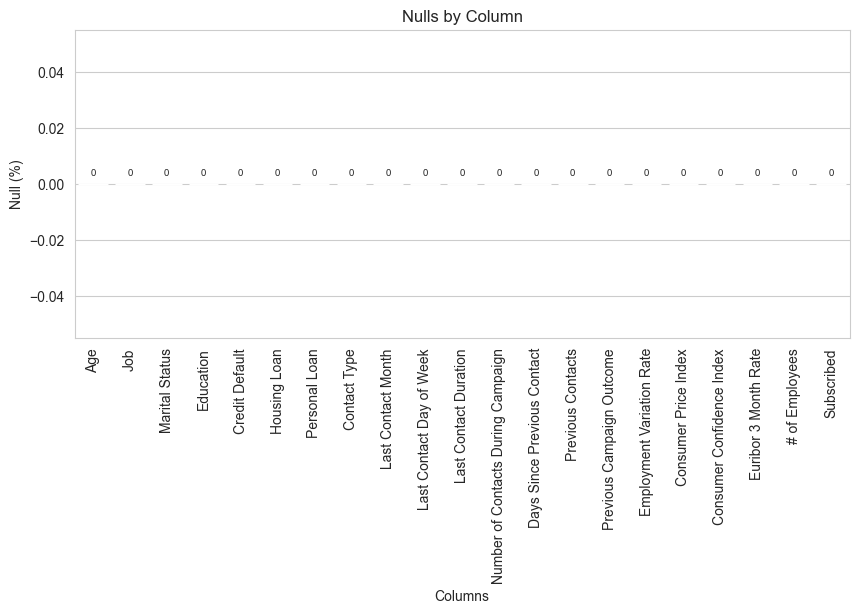

In [102]:
count_null = df.isnull().sum()
percent_null = count_null * 100 / len(df)
missing_df = pd.DataFrame({"col_name": df.columns, "percent_null": np.round(percent_null, 2), "count_null": count_null})

# Create the plot
plt.figure(figsize=(10, 4))
fig = sns.barplot(x="col_name", y="percent_null", data=missing_df)
plt.xticks(rotation=90)
fig.set(xlabel="Columns", ylabel="Null (%)", title="Nulls by Column")

# Loop through the bars in the barplot (fig.patches) and add the data labels for count
for bar, label in zip(fig.patches, missing_df['count_null']):
    fig.annotate(f'{int(label)}',  # Use the actual count as the label
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
                 ha='center', va='center',  # center alignment
                 size=7, xytext=(0, 8),  # size of the text and its position
                 textcoords='offset points') 
plt.show()
df= df.dropna()

<span style="background-color: yellow; padding: 3px; font-weight: bold;">Check for duplicate rows and drop them</span>

In [103]:
duplicates = df.loc[df.duplicated()]

# Print the number of duplicates found
print(f"Number of duplicate rows that was dropped: {len(duplicates)}")

# Drop duplicates
df = df.drop_duplicates()  

Number of duplicate rows that was dropped: 12


<span style="background-color: yellow; padding: 3px; font-weight: bold;">Plot histogram of numerical features</span>

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Objective
The primary business objective of this task is to develop a predictive model that can accurately determine whether a client will subscribe to a term deposit based on various demographic, social, economic, and contact-related features. By achieving this, the bank aims to:

<span style="padding: 3px;color: red;">Increase Campaign Efficiency</span>: By identifying potential customers who are more likely to subscribe, the bank can focus its marketing efforts more effectively, thereby reducing unnecessary contacts and associated costs.
<span style="padding: 3px;color: red;">Optimize Resource Allocation</span>: Efficiently allocate resources such as time, human effort, and marketing budget to target the right customers, enhancing the overall effectiveness of marketing campaigns.
<span style="padding: 3px;color: red;">Improve Customer Targeting</span>: Personalize marketing strategies to better suit the identified segments of customers who are likely to respond positively to the marketing efforts.
<span style="padding: 3px;color: red;">Maximize Subscription Rates</span>: Increase the overall subscription rates for term deposits, contributing to the bank's financial growth and stability.
By implementing a data-driven approach using the developed predictive model, the bank can make informed decisions, improve customer engagement, and achieve higher returns on marketing investments.


<hr style="border: dashed 1px #000;"> 
<p style="color:Red; font-size:15px;font-weight: bold;"> Tasks Involved: </p>
<p style="color:Red; font-size:15px;">Develop a predictive modeling framework to determine whether a client will subscribe to a term deposit based on various demographic, social, economic, and contact-related features.</p>
<p style="color:Red; font-size:15px;">Perform exploratory data analysis to identify potential predictors of user subscription such as demographic, social, economic, and contact-related features.</p>
<p style="color:Red; font-size:15px;">Construct multiple regression models that can quantify the impact of these features on the user subscription. Key tasks include feature selection, model training, and validation to ensure the model accurately captures the relationship of these aforementioned factors.</p>
<p style="color:Red; font-size:15px;">Pinpoint the most influential factors affecting user subscription and provide actionable insights for pricing strategies.</p>



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

<span style="background-color: yellow; padding: 3px; font-weight: bold;">Encode Ordinal and Binary features to Numeric format </span>

In [104]:
# Encode the outcome variable from yes/no to 1/0
df['Subscribed'] = df['Subscribed'].map({'yes': 1, 'no': 0})

#encoding education column
df["Education"].replace({"unknown" : 0, "illiterate" : 1, "high.school" : 2, "university.degree" : 3,
                         "basic.4y" : 4, "basic.6y" : 5, "basic.9y" : 6, "professional.course" : 7}, inplace = True)

In [105]:
print(df.shape)
df.head()

(41176, 21)


,Age,Job,Marital Status,Education,Credit Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day of Week,...,Number of Contacts During Campaign,Days Since Previous Contact,Previous Contacts,Previous Campaign Outcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3 Month Rate,# of Employees,Subscribed
0,56,housemaid,married,4,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,0
1,57,services,married,2,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,0
2,37,services,married,2,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,0
3,40,admin.,married,5,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,0
4,56,services,married,2,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1,94,-36,5,5191,0


(41176, 21)


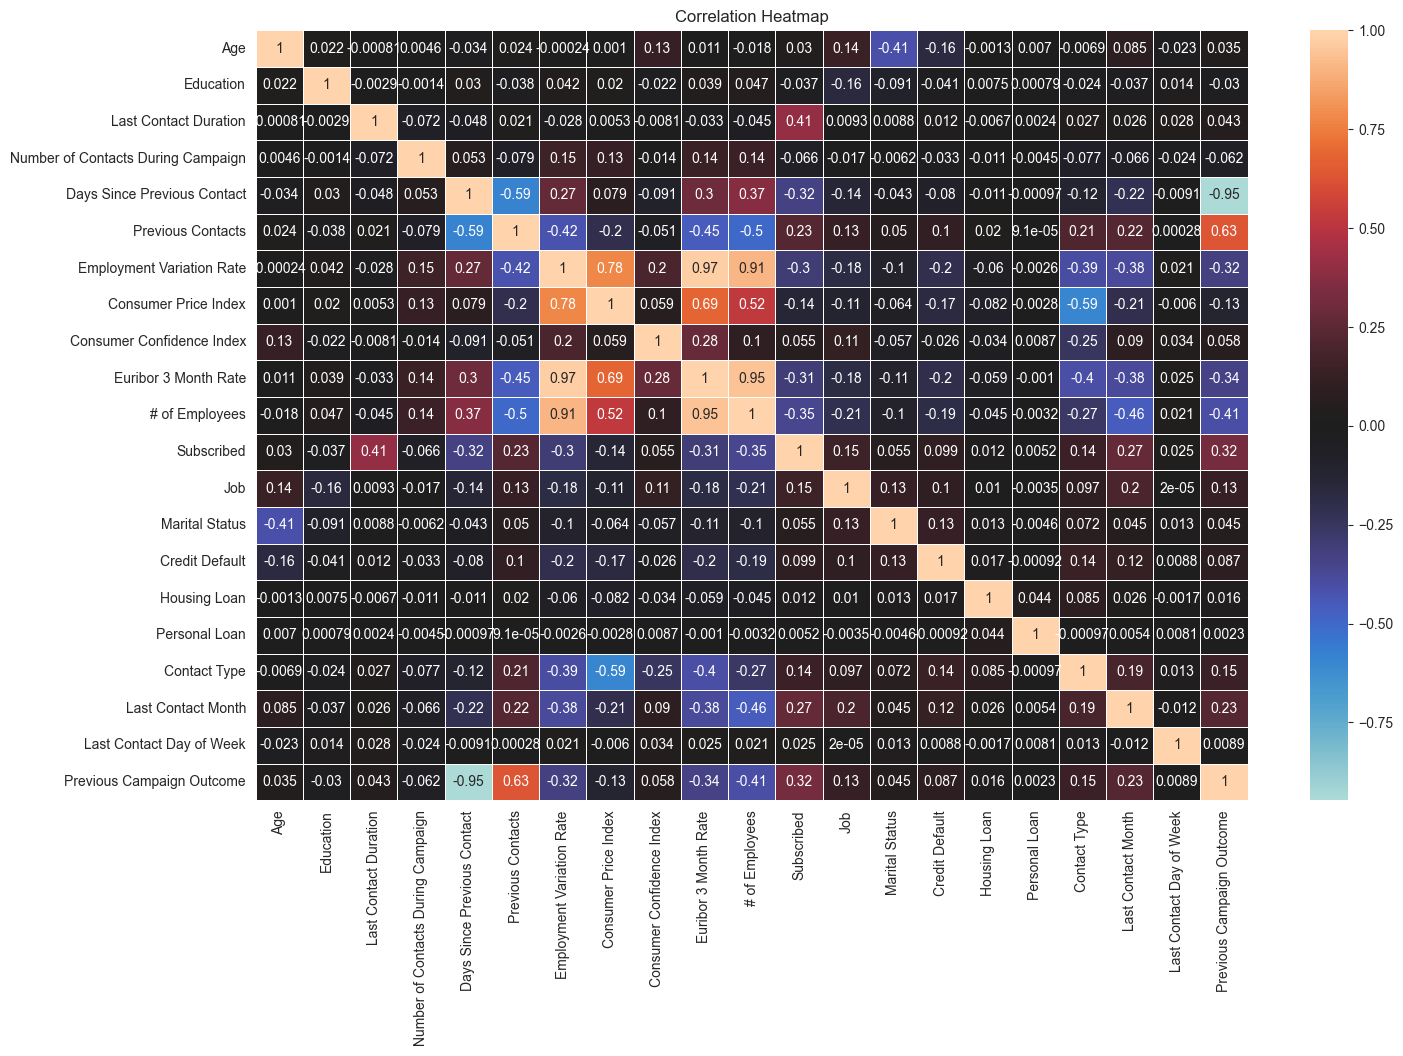

In [113]:
te = TargetEncoder()
TargetEncoded_df = te.fit_transform(df[["Job","Marital Status", "Credit Default", "Housing Loan", "Personal Loan",	"Contact Type",	"Last Contact Month", "Last Contact Day of Week","Previous Campaign Outcome"]], df["Subscribed"])

selected_columns_from_df = df[['Age', 'Education', 'Last Contact Duration', 'Number of Contacts During Campaign', 'Days Since Previous Contact', 'Previous Contacts','Employment Variation Rate', 'Consumer Price Index','Consumer Confidence Index', 'Euribor 3 Month Rate', '# of Employees','Subscribed']]   
Corr_df = pd.concat([selected_columns_from_df, TargetEncoded_df], axis=1)
print(Corr_df.shape)
#correlation heatmap   
sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(16, 10)) 
sns.heatmap(Corr_df.corr(), center = 0, linewidth = .5, annot = True).set(title='Correlation Heatmap');

In [118]:
Corr_df.to_excel('data/CorrOutput.xlsx', index=False)

In [120]:
df_num = Corr_df.drop(["Contact Type", "Last Contact Month", "Last Contact Day of Week", "Previous Campaign Outcome"], axis=1)
X = df_num.drop(["Subscribed", "Last Contact Duration"], axis=1)
y = df_num["Subscribed"]

#SequentialFeatureSelection
sfs = SequentialFeatureSelector(estimator = LogisticRegression(),
                               scoring = "accuracy",
                               cv = 5,
                               n_features_to_select = 7)

sfs.fit(X, y)
sfs.get_feature_names_out(input_features=None)

array(['Age', 'Number of Contacts During Campaign',
       'Days Since Previous Contact', 'Consumer Price Index',
       'Marital Status', 'Housing Loan', 'Personal Loan'], dtype=object)

In [126]:
df = Corr_df[['Age', 'Number of Contacts During Campaign', 'Days Since Previous Contact', 'Consumer Price Index', 'Marital Status',
       'Housing Loan', 'Personal Loan', 'Subscribed']]
# df.to_excel('data/Deleteme.xlsx', index=False)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [129]:
X = df.drop("Subscribed", axis = 1)
y = df["Subscribed"]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the shapes of the train and test sets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28823, 7), (12353, 7), (28823,), (12353,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [131]:
df.head()

,Age,Number of Contacts During Campaign,Days Since Previous Contact,Consumer Price Index,Marital Status,Housing Loan,Personal Loan,Subscribed
0,56,1,999,94,0,0,0,0
1,57,1,999,94,0,0,0,0
2,37,1,999,94,0,0,0,0
3,40,1,999,94,0,0,0,0
4,56,1,999,94,0,0,0,0


In [132]:
y_test.value_counts(normalize = True)[0]

0.884724358455436

In [136]:
 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Number of Contacts During Campaign', 'Days Since Previous Contact', 'Consumer Price Index']),
        ('cat', OneHotEncoder(), ['Marital Status', 'Housing Loan', 'Personal Loan'])
    ])

# Drop rows with missing target values
data_cleaned = df.dropna(subset=['Subscribed'])

# Redefine features and target
X_cleaned = data_cleaned.drop(columns='Subscribed')
y_cleaned = data_cleaned['Subscribed']

# Encode the features again
X_encoded_cleaned = preprocessor.fit_transform(X_cleaned)

# Convert to DataFrame for better readability
X_encoded_df_cleaned = pd.DataFrame(X_encoded_cleaned, columns=preprocessor.get_feature_names_out())

# Re-split the cleaned data
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_encoded_df_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Define a dummy classifier
dummy_clf_cleaned = DummyClassifier(strategy="most_frequent")

# Fit the classifier
dummy_clf_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Make predictions
y_pred_dummy_cleaned = dummy_clf_cleaned.predict(X_test_cleaned)

# Calculate accuracy
baseline_accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_dummy_cleaned)
print(baseline_accuracy_cleaned)
 

0.8821029626032054


### Problem 8: A Simple Model
Use Logistic Regression to build a basic model on your data.  

In [139]:

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Measure the training time
start_time = time.time()

# Train the model
log_reg.fit(X_train_cleaned, y_train_cleaned)

# End the timer
end_time = time.time()
train_time_LR = end_time - start_time

# Make predictions on the training set
y_train_pred = log_reg.predict(X_train_cleaned)
train_accuracy_LR = accuracy_score(y_train_cleaned, y_train_pred)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_cleaned)
test_accuracy_LR = accuracy_score(y_test_cleaned, y_pred_log_reg)

### Problem 9: Score the Model

What is the accuracy of your model?

In [140]:
# Evaluate the model
accuracy = accuracy_score(y_test_cleaned, y_pred_log_reg)

# Print the results
print(f"Baseline Accuracy: {baseline_accuracy_cleaned}")
print(f"Logistic Regression Accuracy: {accuracy}") 
print(f"Train Time: {train_time_LR:.4f} seconds")
print(f"Train Accuracy: {train_accuracy_LR:.4f}")
print(f"Test Accuracy: {test_accuracy_LR:.4f}")

Baseline Accuracy: 0.8821029626032054
Logistic Regression Accuracy: 0.893152015541525
Train Time: 0.1942 seconds
Train Accuracy: 0.8963
Test Accuracy: 0.8932


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [141]:



# Initialize the SVM model
svm_model = SVC(random_state=42)

# Measure the training time
start_time = time.time()

# Train the model
svm_model.fit(X_train_cleaned, y_train_cleaned)

# End the timer
end_time = time.time()
train_time_svm = end_time - start_time

# Make predictions on the training set
y_train_pred_svm = svm_model.predict(X_train_cleaned)
train_accuracy_svm = accuracy_score(y_train_cleaned, y_train_pred_svm)

# Make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test_cleaned)
test_accuracy_svm = accuracy_score(y_test_cleaned, y_test_pred_svm)

# Print the results
print(f"Train Time (s): {train_time_svm:.4f}")
print(f"Train Accuracy: {train_accuracy_svm:.4f}")
print(f"Test Accuracy: {test_accuracy_svm:.4f}")


Train Time (s): 83.1130
Train Accuracy: 0.8996
Test Accuracy: 0.8942


In [142]:

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Measure the training time
start_time = time.time()

# Train the model
knn_model.fit(X_train_cleaned, y_train_cleaned)

# End the timer
end_time = time.time()
train_time_knn = end_time - start_time

# Make predictions on the training set
y_train_pred_knn = knn_model.predict(X_train_cleaned)
train_accuracy_knn = accuracy_score(y_train_cleaned, y_train_pred_knn)

# Make predictions on the test set
y_test_pred_knn = knn_model.predict(X_test_cleaned)
test_accuracy_knn = accuracy_score(y_test_cleaned, y_test_pred_knn)

# Print the results
print(f"Train Time (s): {train_time_knn:.4f}")
print(f"Train Accuracy: {train_accuracy_knn:.4f}")
print(f"Test Accuracy: {test_accuracy_knn:.4f}")

Train Time (s): 3.3278
Train Accuracy: 0.9099
Test Accuracy: 0.8859


In [143]:

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Measure the training time
start_time = time.time()

# Train the model
dt_model.fit(X_train_cleaned, y_train_cleaned)

# End the timer
end_time = time.time()
train_time_dt = end_time - start_time

# Make predictions on the training set
y_train_pred_dt = dt_model.predict(X_train_cleaned)
train_accuracy_dt = accuracy_score(y_train_cleaned, y_train_pred_dt)

# Make predictions on the test set
y_test_pred_dt = dt_model.predict(X_test_cleaned)
test_accuracy_dt = accuracy_score(y_test_cleaned, y_test_pred_dt)

# Print the results
print(f"Train Time (s): {train_time_dt:.4f}")
print(f"Train Accuracy: {train_accuracy_dt:.4f}")
print(f"Test Accuracy: {test_accuracy_dt:.4f}")

Train Time (s): 0.1527
Train Accuracy: 0.9503
Test Accuracy: 0.8734


In [144]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree'],
    'Train Time (s)': [train_time_LR, train_time_svm, train_time_knn, train_time_dt],
    'Train Accuracy': [train_accuracy_LR, train_accuracy_svm, train_accuracy_knn, train_accuracy_dt],
    'Test Accuracy': [test_accuracy_LR, test_accuracy_svm, test_accuracy_knn, test_accuracy_dt]
})
pd.set_option('display.float_format', lambda x: '%.5f' % x)
results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.19418,0.89627,0.89315
1,SVM,83.11296,0.89957,0.89424
2,KNN,3.32785,0.90993,0.88587
3,Decision Tree,0.15273,0.95033,0.87336


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:

# List of categorical columns
categorical_cols = [
    'Job', 'Marital Status', 'Education', 'Credit Default', 'Housing Loan',
    'Personal Loan', 'Contact Type', 'Last Contact Month', 'Last Contact Day of Week',
    'Previous Campaign Outcome'
]

# Handle missing values
# For simplicity, let's fill missing values with the most frequent value for categorical features
# and with the mean for numerical features

# Categorical features
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Subscription (Yes/No)')

for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
 

# Define features and target
X = df.drop(columns='Subscription (Yes/No)')
y = df['Subscription (Yes/No)']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit a Random Forest model to assess feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_encoded.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

# Display the feature importances with scores
print(feature_importances)



##### Questions